### Análise Exploratória de Dados - Evolução do Coronavírus no Brasil

#### Victor Hugo Negrisoli - Desenvolvedor Full-Stack & Analista de Dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/brazil_covid19.csv')

In [3]:
df = df.rename(columns = {
    'date': 'data',
    'region': 'regiao',
    'state': 'estado',
    'cases': 'casos',
    'deaths': 'mortes'
})

In [4]:
# Descrevendo características estatísticas básicas do dataset

df.describe()

,casos,mortes
count,2484.000000,2484.000000
mean,432.790660,26.966184
std,1750.606141,137.688874
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,168.000000,4.000000
max,28698.000000,2375.000000


In [5]:
# Top 10 maiores estados agrupados por número de casos

analise_1 = df.groupby("estado").sum().sort_values(by = "casos").tail(10)

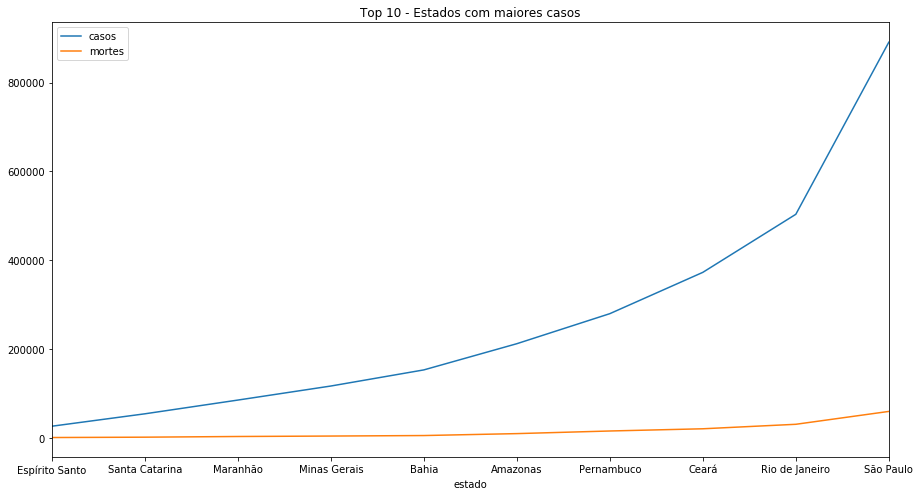

In [6]:
analise_1.cumsum().plot(
    title = "Top 10 - Estados com maiores casos",
    figsize=(15, 8)
)

In [7]:
# Função para converter valores do dataset no formato padrão

def converterData(data):
    return datetime.strptime(data, "%Y-%m-%d").date()

In [8]:
datas = df["data"]
for i in range(len(datas)):
    df.loc[i, "data"] = converterData(datas[i])

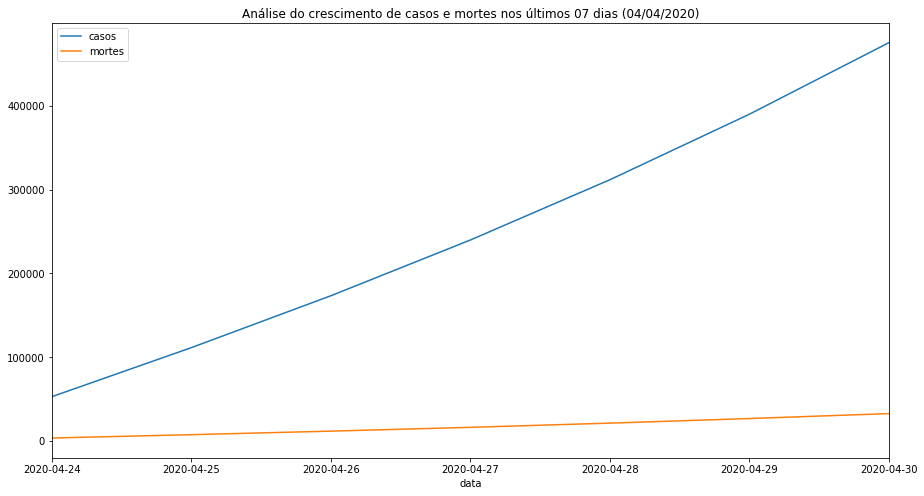

In [9]:
analise_2 = df.groupby("data").sum().sort_values(by = "casos").tail(7)
analise_2.cumsum().plot(
    title = "Análise do crescimento de casos e mortes nos últimos 07 dias (04/04/2020)",
    figsize=(15, 8))

In [10]:
# Filtrando sempre pela última data do CSV

ultima_data = df["data"].max()
df_ultima_data = df[df["data"] == ultima_data].sort_values(by = "casos")
df_ultima_data

,data,regiao,estado,casos,mortes
2476,2020-04-30,Norte,Tocantins,137,3
2460,2020-04-30,Centro-Oeste,Mato Grosso do Sul,255,9
2459,2020-04-30,Centro-Oeste,Mato Grosso,297,11
2470,2020-04-30,Norte,Acre,404,19
2469,2020-04-30,Nordeste,Sergipe,447,12
2474,2020-04-30,Norte,Rondônia,502,16
2467,2020-04-30,Nordeste,Piauí,513,24
2475,2020-04-30,Norte,Roraima,519,7
2458,2020-04-30,Centro-Oeste,Goiás,781,29
2465,2020-04-30,Nordeste,Paraíba,814,62


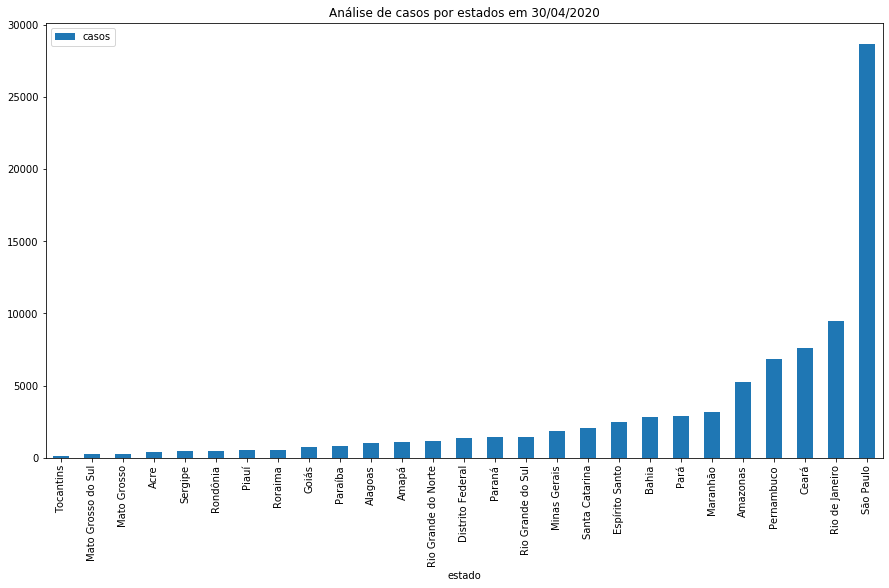

In [11]:
# Analisando casos por estados na última data presente no CSV

date_format = "%d/%m/%Y"
ultima_data = ultima_data.strftime(date_format)

df_plot = df_ultima_data[["estado", "casos"]]

df_plot.index = df_ultima_data["estado"]
df_plot.plot(
    title = "Análise de casos por estados em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

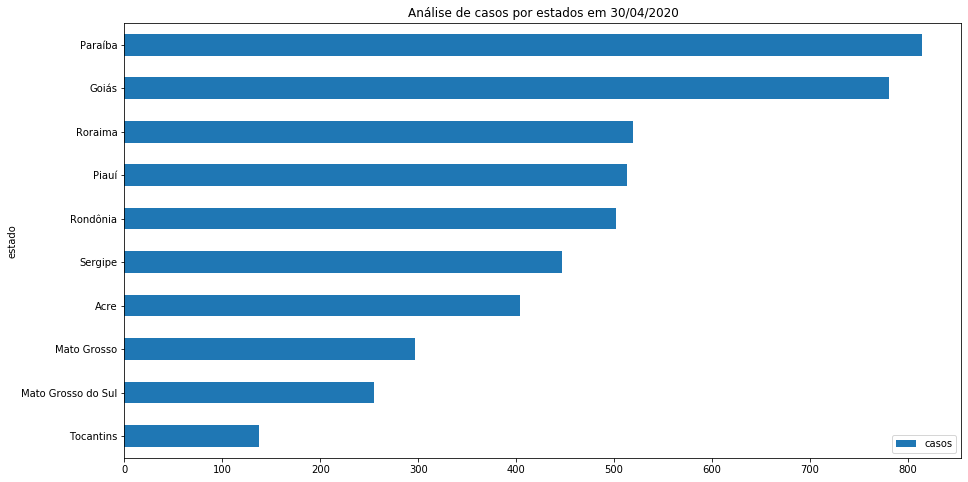

In [12]:
# Analisando top 10 estados com menos casos por estados na última data presente no CSV

df_plot = df_ultima_data[["estado", "casos"]]
df_plot.index = df_ultima_data["estado"]
df_plot.head(10).plot(
    title = "Análise de casos por estados em {}".format(ultima_data),
    kind = "barh", 
    figsize = (15, 8)
)

In [13]:
# Agrupando os casos pela região

df_group_regiao = df_ultima_data[["regiao", "casos"]].groupby(["regiao"]).sum().sort_values(by = "casos")
df_group_regiao.head()

,casos
regiao,
Centro-Oeste,2689
Sul,4958
Norte,10772
Nordeste,24518
Sudeste,42443


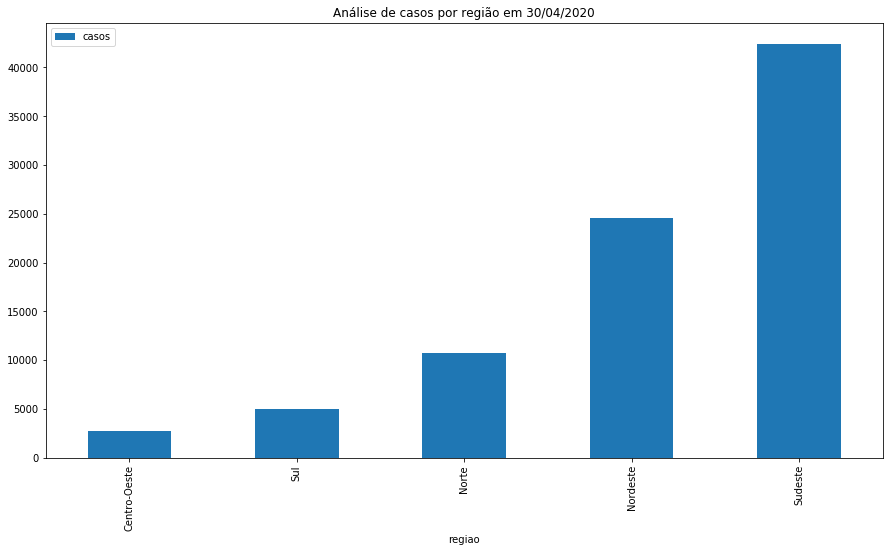

In [14]:
# Analisando a quantidade de casos por região

df_group_regiao.plot(
    title = "Análise de casos por região em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

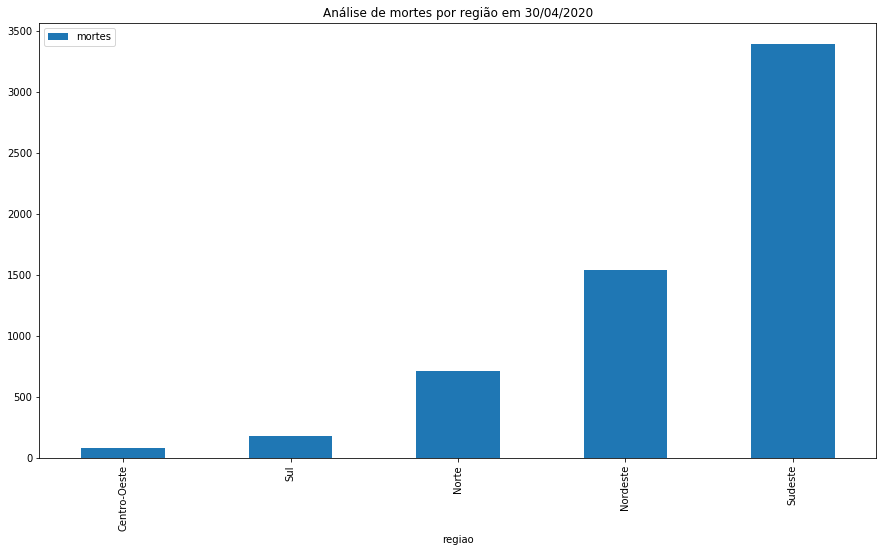

In [15]:
# Agrupando os casos pela região

df_group_regiao_mortes = df_ultima_data[["regiao", "mortes"]].groupby(["regiao"]).sum().sort_values(by = "mortes")

# Analisando a quantidade de casos por região

df_group_regiao_mortes.plot(
    title = "Análise de mortes por região em {}".format(ultima_data),
    kind = "bar", 
    figsize = (15, 8)
)

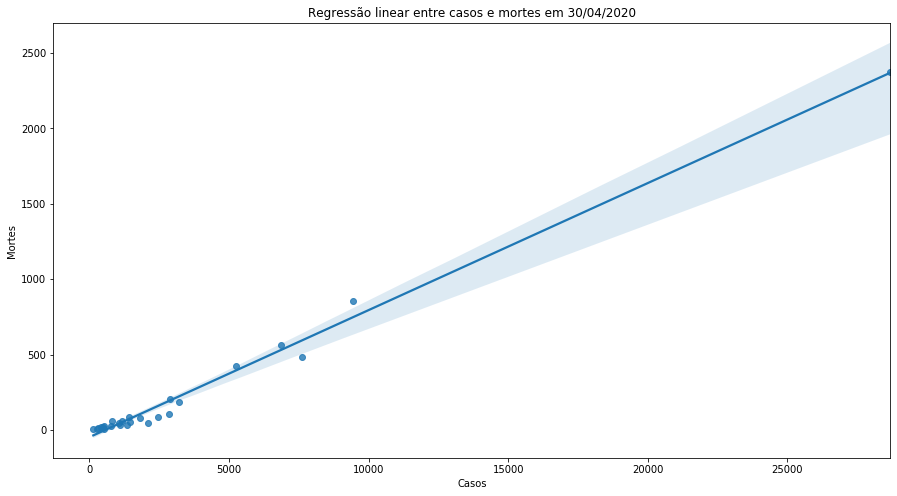

In [16]:
# Regressão linear das variáveis casos e mortes

df_reg_casos_mortes = df_ultima_data[["casos", "mortes"]]
casos = df_reg_casos_mortes["casos"]
mortes = df_reg_casos_mortes["mortes"]

sns.regplot(casos, mortes, df_reg_casos_mortes)
plt.xlabel("Casos")
plt.ylabel("Mortes")
plt.title("Regressão linear entre casos e mortes em {}".format(ultima_data))
plt.gcf().set_size_inches(15, 8)

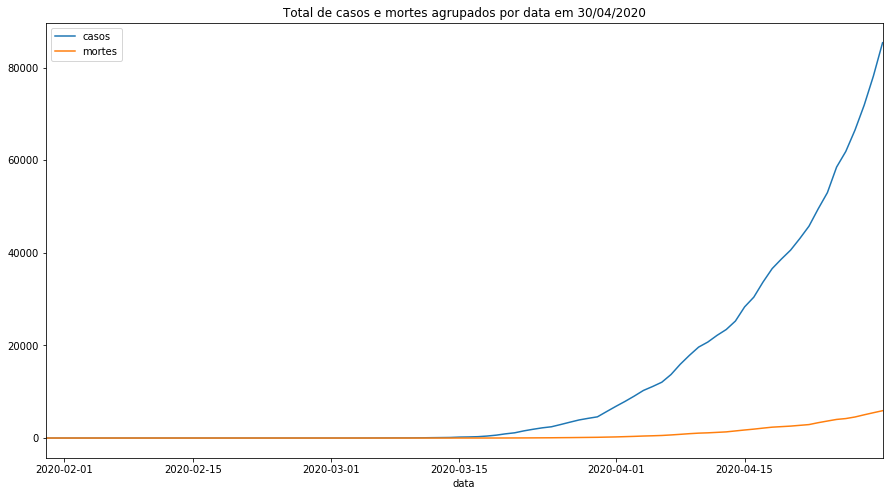

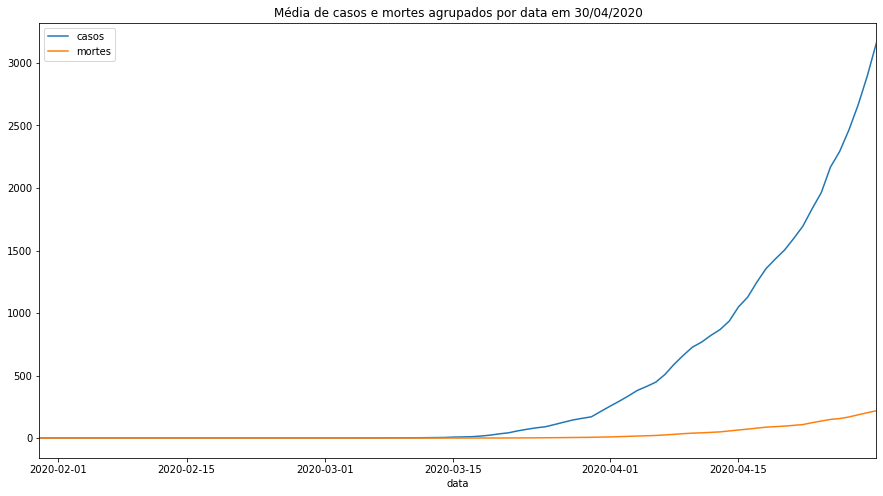

In [20]:
df_group_data_sum = df[["data", "casos", "mortes"]].groupby(["data"]).sum()

df_group_data_sum.plot(
    title = "Total de casos e mortes agrupados por data em {}".format(ultima_data),
    kind = "line", 
    figsize = (15, 8)
)

df_group_data_mean = df[["data", "casos", "mortes"]].groupby(["data"]).mean()

df_group_data_mean.plot(
    title = "Média de casos e mortes agrupados por data em {}".format(ultima_data),
    kind = "line",
    figsize = (15, 8)
)

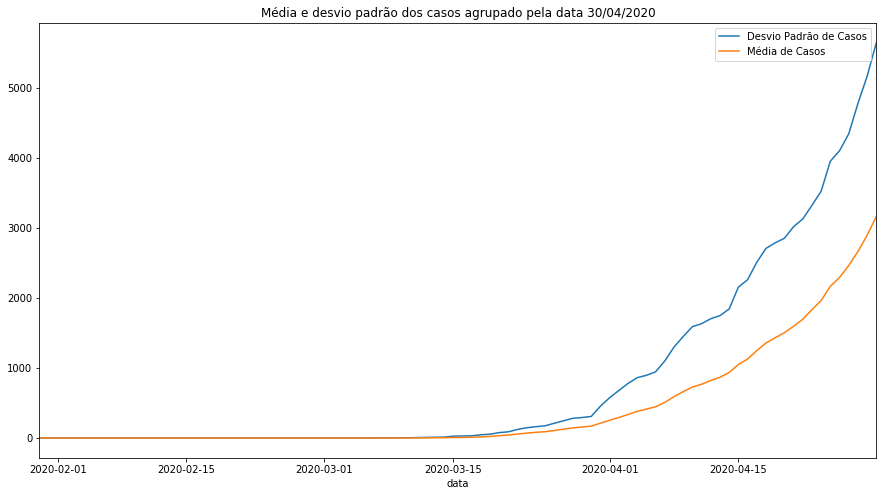

In [18]:
df_group_data_mean = df[["data", "casos"]].groupby(["data"]).mean()

df_group_data_mean = df_group_data_mean.rename(columns = {'casos': 'Média de Casos'})

df_group_data_std = df[["data", "casos"]].groupby(["data"]).std()

df_group_data_std = df_group_data_std.rename(columns = {'casos': 'Desvio Padrão de Casos'})

ax = df_group_data_std.plot(kind = "line", label = "Média")

df_group_data_mean.plot(
    kind = "line",
    ax = ax,
    title = "Média e desvio padrão dos casos agrupado pela data {}".format(ultima_data),
    figsize = (15, 8)
)

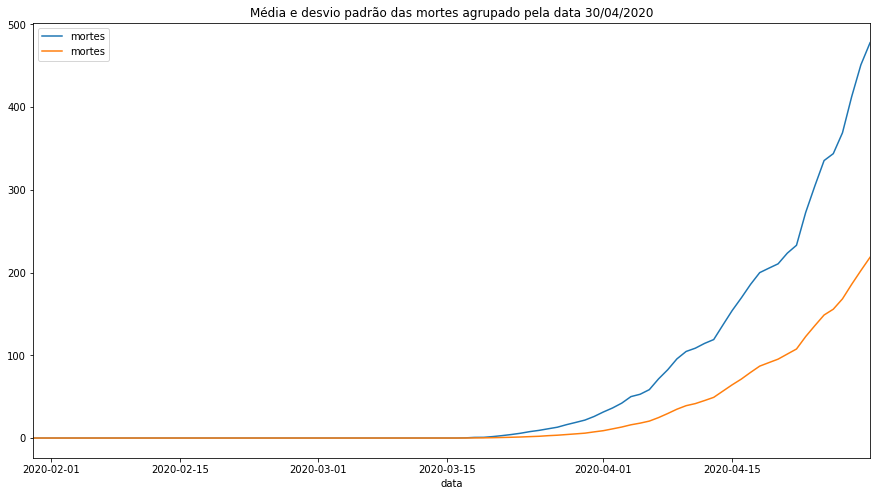

In [19]:
df_group_data_mean = df[["data", "mortes"]].groupby(["data"]).mean()

df_group_data_mean = df_group_data_mean.rename(columns = {'casos': 'Média de Casos'})

df_group_data_std = df[["data", "mortes"]].groupby(["data"]).std()

df_group_data_std = df_group_data_std.rename(columns = {'casos': 'Desvio Padrão de Casos'})

ax = df_group_data_std.plot(kind = "line", label = "Média")

df_group_data_mean.plot(
    kind = "line",
    ax = ax,
    title = "Média e desvio padrão das mortes agrupado pela data {}".format(ultima_data),
    figsize = (15, 8)
)